In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdf_helper as sh
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
# hard_drive = '/local_raid/honproj2/conan/'
# simulation = hard_drive + '/sim_400_15/'
simulation = '/local_raid/honproj2/conan/sim_5_hall'
print(os.listdir())
os.chdir(simulation)
#df = pd.read_csv('python_output.csv')
#df.head()




['Stacked_Current_Density.ipynb']


In [3]:
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)


In [4]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

In [49]:
class CustomNorm(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, clip=False):
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Ensure input is a masked array with correct mask
        value = np.ma.masked_invalid(value)
        # Normalize positive values between 0.0 and 1.0
        res = np.ma.masked_less_equal(value, 0)
        # Map negative values to 0.0, and scale positive values between 0.5 and 1.0
        res = np.where(res.mask, 0.0, 0.5 + 0.5 * (res.data - self.vmin) / (self.vmax - self.vmin))
        return res


def plot_stacked(ds, data_dir='Data'):
    '''Input list of times ds and returns a stacked plot of current densitylsdir'''
    n = len(ds)
    fig, axs = plt.subplots(n, 1, figsize=(15, 3*n), sharex=True)
    norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=100)
   # Example usage with your data
    vmin = -10  # Minimum of the positive values
    vmax = 122.27198531976781  # Maximum value
    #norm = CustomNorm(vmin=vmin, vmax=vmax)
    if n == 1:
        axs = [axs]
    
    for i, d in enumerate(ds):
        data = sh.getdata(d, data_dir, verbose=False)
        t = data.Last_dump_time_requested.data
        g = data.Grid_Grid
        xb = g.data[0]
        yb = g.data[1]
        current = data.Current_Jz.data
        print(d, np.max(current), np.min(current))
        X, Y = np.meshgrid(xb, yb, indexing='ij')
        
        pcm = axs[i].pcolormesh(X, Y, current, norm=norm, cmap='magma')
        axs[i].pcolormesh(X, -Y, current,norm=norm, cmap='magma')
        #axs[i].set_ylim([-0.1, 0.1])
        axs[i].set_ylabel(r'$z$', size=25)
        #axs[i].set_xlabel('x')
        #axs[i].set_title(f'Current at time t={np.round(t, 4)}', verticalalignment='bottom')
        # Set the maximum number of y-ticks
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        
        
        label = chr(97 + i)  # 97 is the ASCII code for 'a'
        axs[i].set_title(f'({label})' , font='Palentino', fontsize=20, pad=10)
        axs[i].text(0.02, 0.95, r'$t =$'+f'{np.round(t, 4)}', transform=axs[i].transAxes,
                    verticalalignment='top', horizontalalignment='left',
                    color='white', fontsize=25, fontweight=500)
        #Label each subplot 
        # Time placement alternative
        '''label = chr(97 + i)  # 97 is the ASCII code for 'a'
        axs[i].text(0.02, 0.95, f'({label}) '+ r'$t =$'+f'{np.round(t, 4)}', transform=axs[i].transAxes,
                    verticalalignment='top', horizontalalignment='left',
                    color='white', fontsize=18, fontweight=500)'''
    
    #fig.text(0.5, 0.04, 'x', ha='center')

    axs[-1].set_xlabel(r'$x$', size=25)
    cbar_left = 0.92
    cbar_bottom = 0.07
    cbar_width = 0.02
    cbar_height = 0.85
    
    
    cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
    cbar = fig.colorbar(pcm, cax=cbar_ax)
    cbar.set_label(r'Current Density $J_y$', size=30, font='ariel')
    fig.suptitle(r'Current density $J_y$ at various times for $S_L = 10^3$', size=30)
    plt.tight_layout(rect=[0, 0, 0.92, 1])
    
    plt.show()
    return fig

2 721.0445475300083 -45.467303002431336
20 467.8745353681339 -21.8094961614166
60 170.12038201679323 -50.685482676967084
70 230.74689405052854 -83.3288627667503


/tmp/ipykernel_3754213/3852092788.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


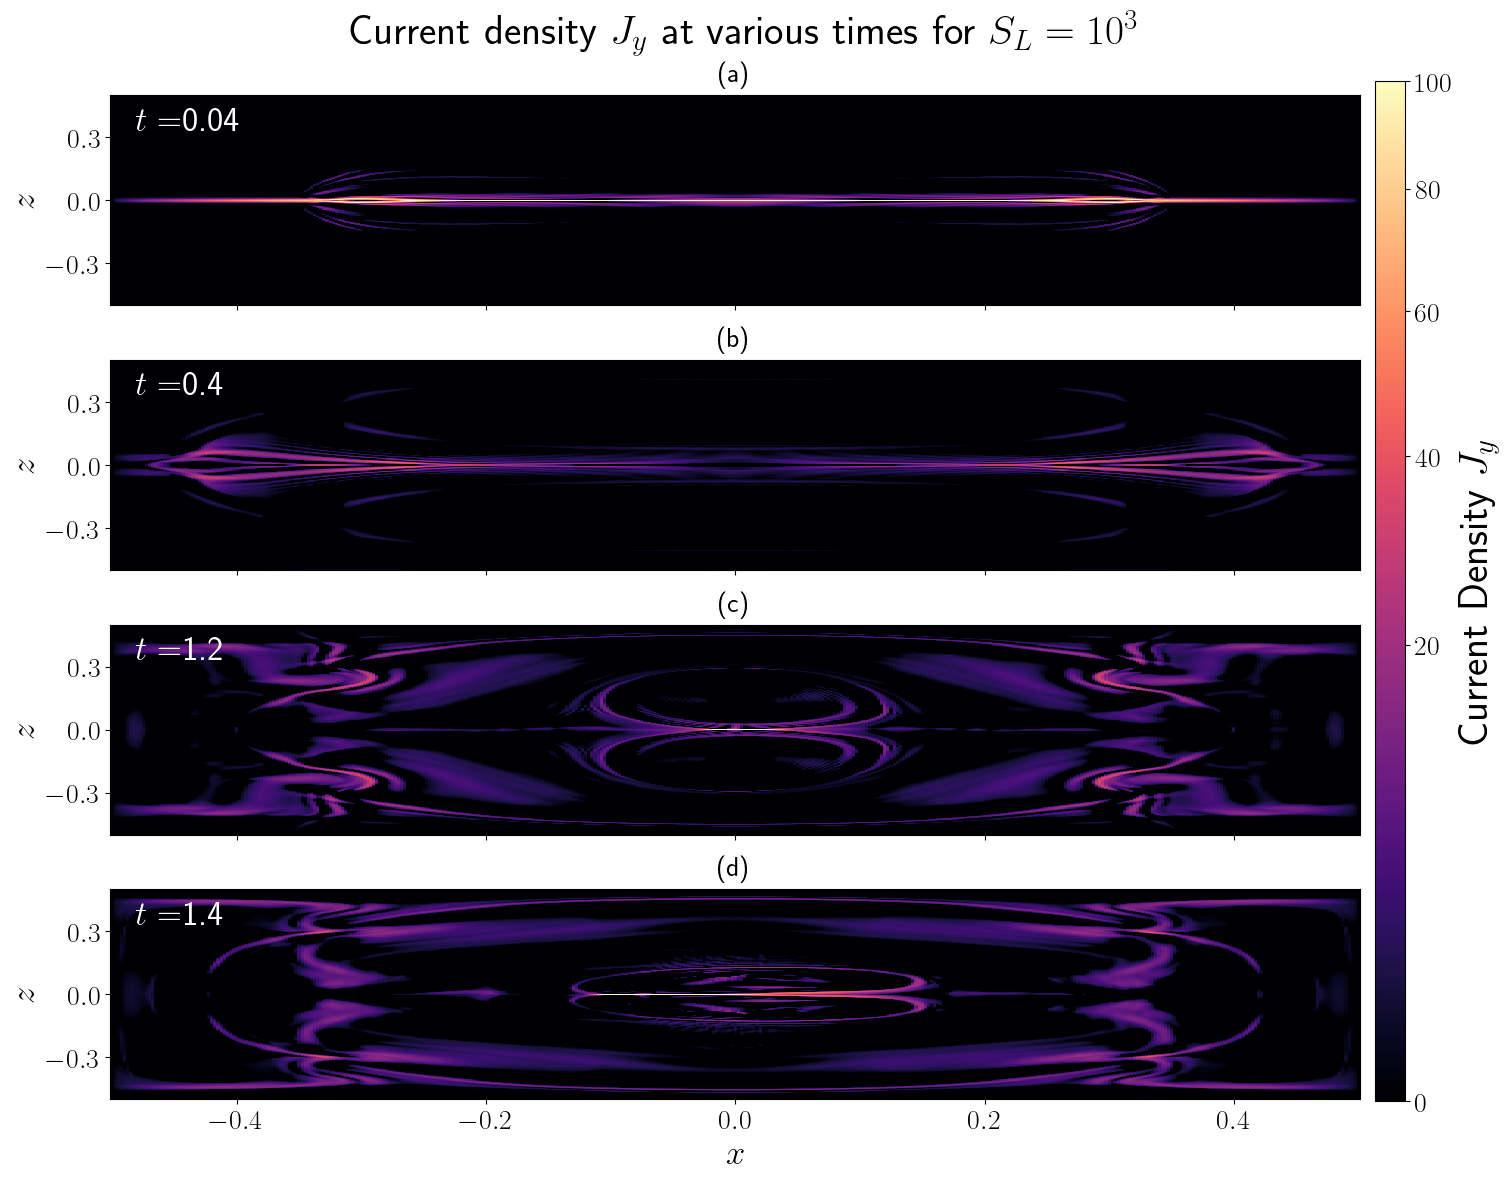

In [50]:
fig = plot_stacked([2,20, 60, 70])
#fig.savefig('sweet_parker_7_small.png') 
